Questions: 
1. Which age groups are using which devices to watch Netflix?
2. Does Subscription type affect distribution across age groups?

First, I used another notebook to bin and split the larger age range of 26-51 of users into brackets of under 25-34, 35-44, and 45+. I added the age groups as their own column and saved as a new CSV to keep it a bit more manageable for myself when working with the data and to clean up my notebooks.

After filtering and making sure I didn’t have any duplicates, I wanted to count the amount of users per age group and used this to make my user count/age range bar graph. The most represented age range is 35-44.

I also counted devices used and made a pie chart of the devices used across users, reflecting relatively even usage. Devices used were Smart TVs, Laptops, Smartphones, and Tablets. 

I then created a bar chart to compare the use of devices versus age groups. When comparing the binned age groups to the devices used, we can see that the 25-34 group prefers Tablet usage, 35-44 prefers Laptop usage, and 45+ prefers Smart TV use.

Comparing age groups and Subscription types, the Basic subscription type is the most popular between all binned age groups. Subscription types were almost evenly spread but we can see that Basic is the most popular by far with Standard close behind and Premium last.

I would be curious to see a larger age range, especially in light of Netflix's password sharing crackdowns; it seems families tend to share Netflix accounts with younger relatives. Netflix could use that data to make decisions regarding family accounts, account sharing, targeting shows to certain age demographics, etc.


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline
import seaborn as sns

In [2]:
csv_path = Path("/Users/olive/Desktop/Edited Netflix Userbase.csv")
netflix_user_df = pd.read_csv(csv_path)

netflix_user_df.drop(['User ID'],axis=1, inplace=True)

netflix_user_df.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Netflix User Age Range
0,Basic,10,15-01-22,10/6/23,United States,28,Male,Smartphone,1 Month,25-34
1,Premium,15,5/9/21,22-06-23,Canada,35,Female,Tablet,1 Month,25-34
2,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month,35-44
3,Standard,12,10/7/22,26-06-23,Australia,51,Female,Laptop,1 Month,45+
4,Basic,10,1/5/23,28-06-23,Germany,33,Male,Smartphone,1 Month,25-34


In [3]:
netflix_user_df.count()

Subscription Type         2500
Monthly Revenue           2500
Join Date                 2500
Last Payment Date         2500
Country                   2500
Age                       2500
Gender                    2500
Device                    2500
Plan Duration             2500
Netflix User Age Range    2500
dtype: int64

In [4]:
netflix_user_df = netflix_user_df.dropna(how='any')

In [5]:
netflix_user_df.dtypes

Subscription Type         object
Monthly Revenue            int64
Join Date                 object
Last Payment Date         object
Country                   object
Age                        int64
Gender                    object
Device                    object
Plan Duration             object
Netflix User Age Range    object
dtype: object

In [6]:
netflix_user_df = netflix_user_df.astype({"Age": str}, errors='raise')

In [7]:
netflix_user_df['Age'].dtype

dtype('O')

In [8]:
netflix_user_df['Device'].value_counts()

Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: Device, dtype: int64

In [9]:
netflix_user_df['Age'].value_counts()

39    116
30    116
28    115
31    115
41    114
47    111
37    107
35    105
29    104
40    103
42    102
48    101
46     99
36     99
49     97
43     94
33     93
51     93
32     92
45     89
38     89
34     88
27     87
44     86
50     84
26      1
Name: Age, dtype: int64

In [10]:
netflix_user_df['Netflix User Age Range'].value_counts()

35-44    999
25-34    916
45+      585
Name: Netflix User Age Range, dtype: int64

In [11]:
if netflix_user_df.duplicated().any():
    print("Duplicates found!")
else:
    print("No duplicates found.")

No duplicates found.


In [12]:
print(netflix_user_df["Age"].max())
print(netflix_user_df["Age"].min())

51
26


In [14]:
age_groups = netflix_user_df.groupby('Netflix User Age Range')

count_ages = age_groups['Netflix User Age Range'].count()

count_ages

Netflix User Age Range
25-34    916
35-44    999
45+      585
Name: Netflix User Age Range, dtype: int64

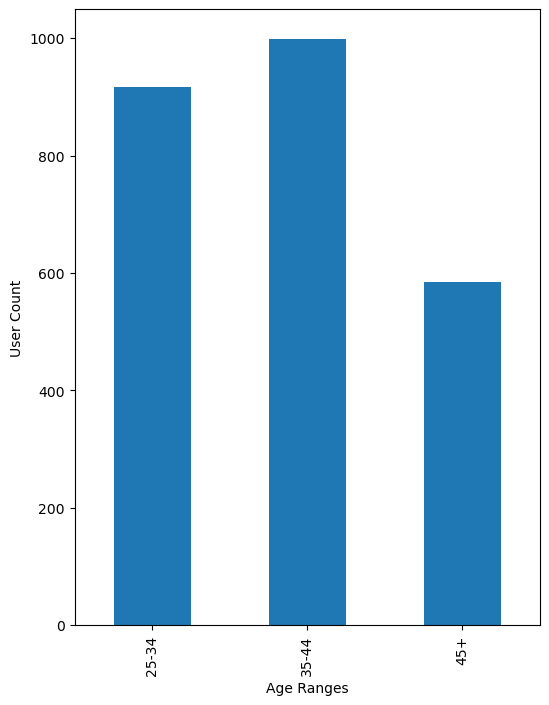

In [15]:
count_chart = count_ages.plot(kind='bar', figsize=(6,8))


count_chart.set_xlabel("Age Ranges")
count_chart.set_ylabel("User Count")

plt.show()

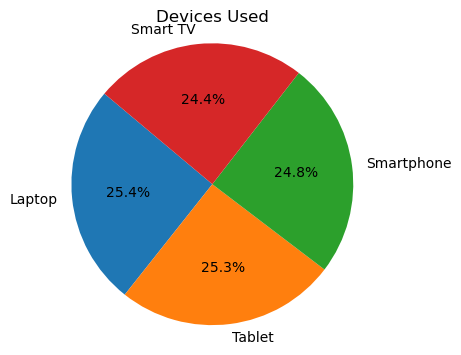

In [16]:
plt.figure(figsize=(4, 4))
plt.pie(netflix_user_df['Device'].value_counts(),labels=netflix_user_df['Device'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Devices Used')
plt.axis('equal')
plt.show()

In [17]:
netflix_user_df['Device'].value_counts()

Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: Device, dtype: int64

In [18]:
netflix_user_df.groupby(by=["Device", "Netflix User Age Range"], as_index=False).size()

,Device,Netflix User Age Range,size
0,Laptop,25-34,221
1,Laptop,35-44,266
2,Laptop,45+,149
3,Smart TV,25-34,231
4,Smart TV,35-44,228
5,Smart TV,45+,151
6,Smartphone,25-34,227
7,Smartphone,35-44,258
8,Smartphone,45+,136
9,Tablet,25-34,237


In [19]:
print (netflix_user_df.groupby(['Device','Netflix User Age Range']).size().unstack(fill_value=0))

Netflix User Age Range  25-34  35-44  45+
Device                                   
Laptop                    221    266  149
Smart TV                  231    228  151
Smartphone                227    258  136
Tablet                    237    247  149


<Axes: xlabel='Device'>

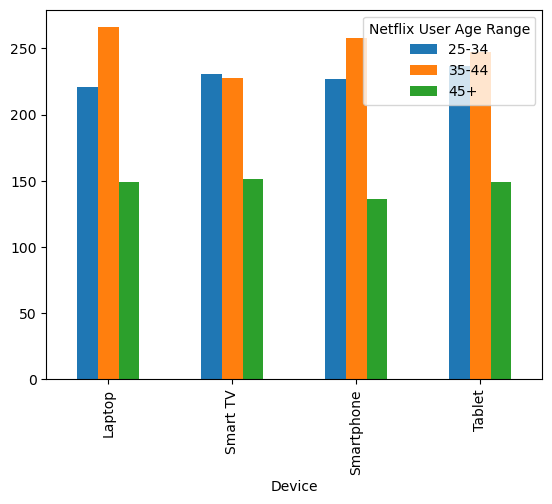

In [20]:
netflix_user_df.groupby(['Device','Netflix User Age Range']).size().unstack(fill_value=0).plot.bar()

<Axes: xlabel='Subscription Type'>

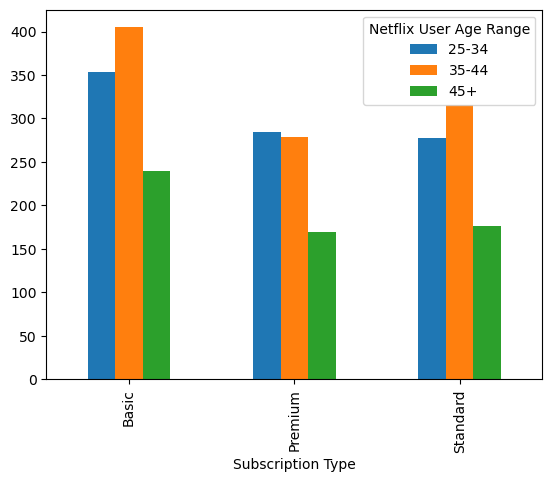

In [21]:
netflix_user_df.groupby(['Subscription Type','Netflix User Age Range']).size().unstack(fill_value=0).plot.bar()

In [22]:
netflix_user_df.groupby(by=["Subscription Type", "Netflix User Age Range"], as_index=False).size()

,Subscription Type,Netflix User Age Range,size
0,Basic,25-34,354
1,Basic,35-44,405
2,Basic,45+,240
3,Premium,25-34,285
4,Premium,35-44,279
5,Premium,45+,169
6,Standard,25-34,277
7,Standard,35-44,315
8,Standard,45+,176


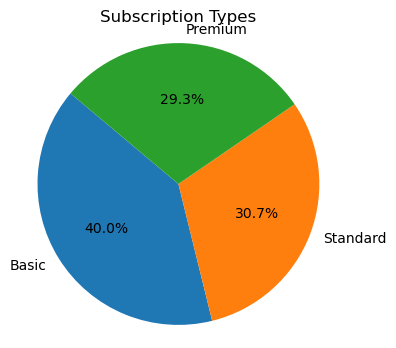

In [23]:
plt.figure(figsize=(4, 4))
plt.pie(netflix_user_df['Subscription Type'].value_counts(),labels=netflix_user_df['Subscription Type'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Subscription Types')
plt.axis('equal')
plt.show()
